In [1]:
from polymorph_s2df import *
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt

In [7]:
c = Circle(1).translate(jnp.asarray([2, 3])).rotate(0.2).smooth_union(0.1, Box(4, 1).translate(jnp.asarray([4, 1.5])))
c

SmoothUnion(
  0.1,
  Rotation(
    0.2, 
    Translation(
      [2 3],
      Circle(1)
    )
  ), 
  Translation(
    [4.  1.5],
    Box(4, 1)
  ) 
)

In [8]:
c.distance(jnp.asarray([2, 3]))

Array(-0.28009105, dtype=float32)

In [9]:
c.is_inside(jnp.asarray([3, 3]))

Array(1., dtype=float32)

In [12]:
def render(shape, bounds=(-3, 3), n=500):
    x = jnp.linspace(bounds[0], bounds[1], n)
    X, Y = jnp.meshgrid(x, x)

    grid_points = jnp.column_stack((X.flatten(), Y.flatten()))
    vec_is_inside = jax.jit(jax.vmap(lambda x: 1 - shape.is_inside(x)))
    plt.imshow(vec_is_inside(grid_points).reshape(n, n), cmap="gray", origin="lower", extent=[bounds[0], bounds[1],bounds[0], bounds[1]])

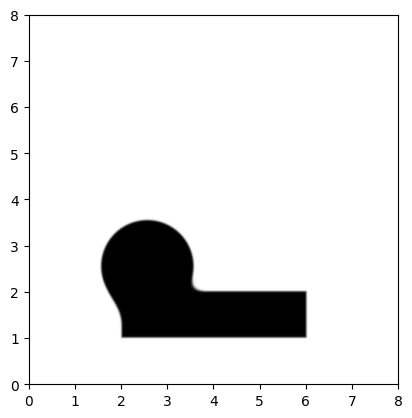

In [13]:
render(c, [0, 8])